## Plotting NOAA Mt Manfield and Burlington Airport (BTV) daily snow depth data as proxy for Wade and Hungerford snow depths

### Data downloaded for WY22 and WY23 from NOAA portal on 2024-11-27
### Soil sensor data downloaded from Aquarius - see notebook
    - For now, renamed the 'Timestamp (UTC-05:00)' column to 'Timestamp' manually

### TO DO:

- [ ] plot snowdepth vs soil temp and moisture from soil sensor pits (1 per watershed)
- [ ] figure out read-in for soil sensor csvs Timestamp with spaces

[1] "figure/-1/noaa-snopack.png"
attr(,"class")
[1] "knit_image_paths" "knit_asis"       

Warning message in geom_line(data = mmsf_data, aes(x = date, y = SNWD), color = "blue", :
“Ignoring unknown parameters: `label`”
Warning message:
“Removed 614 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16655 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16655 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16655 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 16655 rows containing missing values (`geom_line()`).”


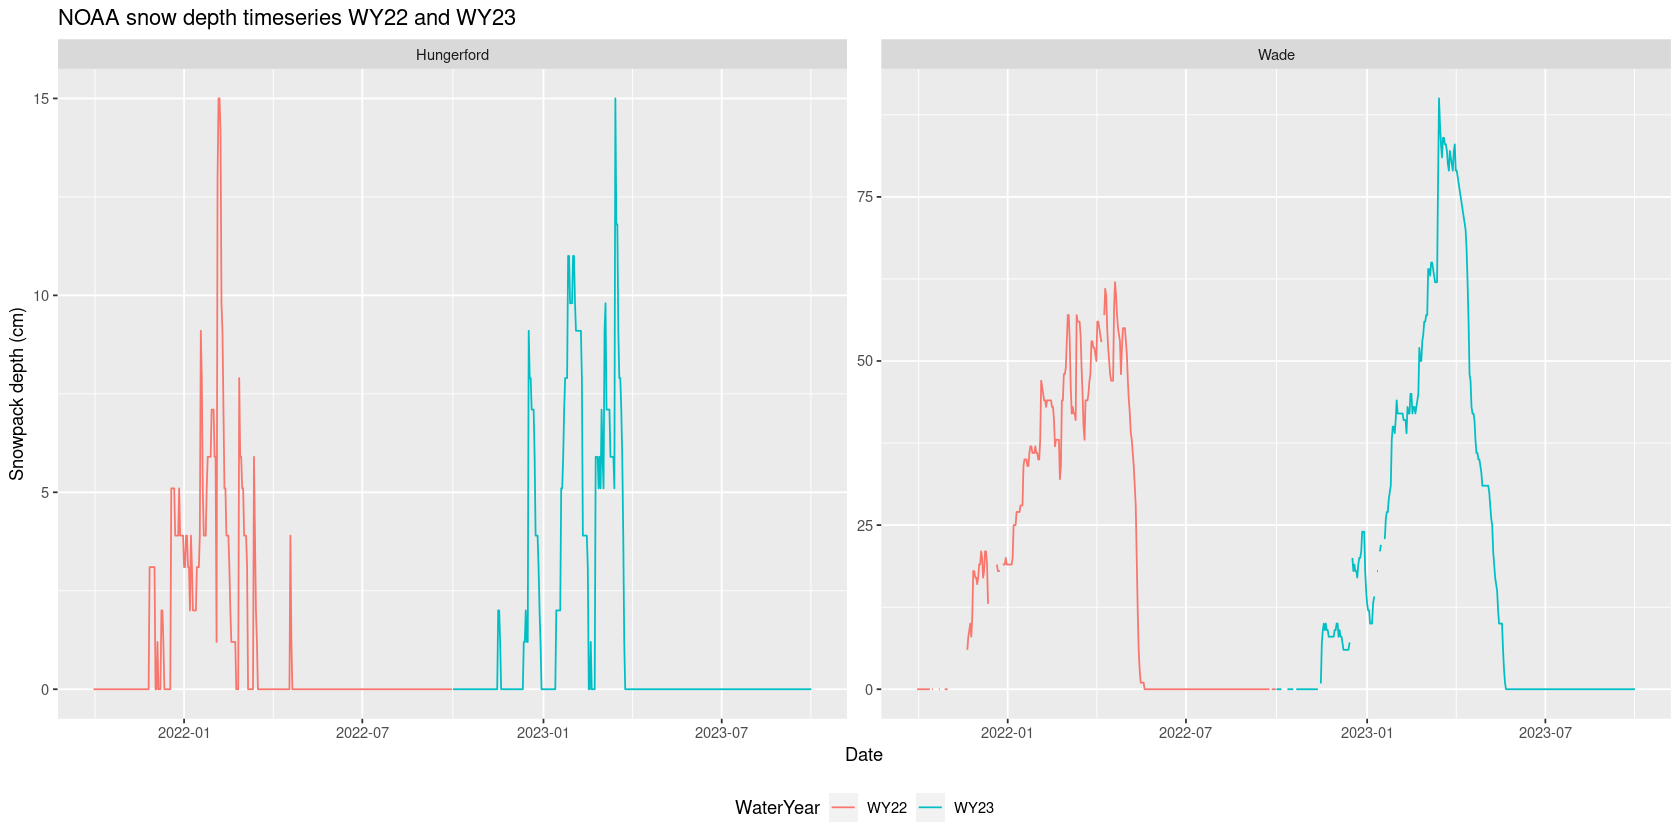

Warning message:
“Removed 613 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 17856 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 17856 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 17856 rows containing missing values (`geom_line()`).”
Warning message:
“Removed 2354 rows containing missing values (`geom_line()`).”


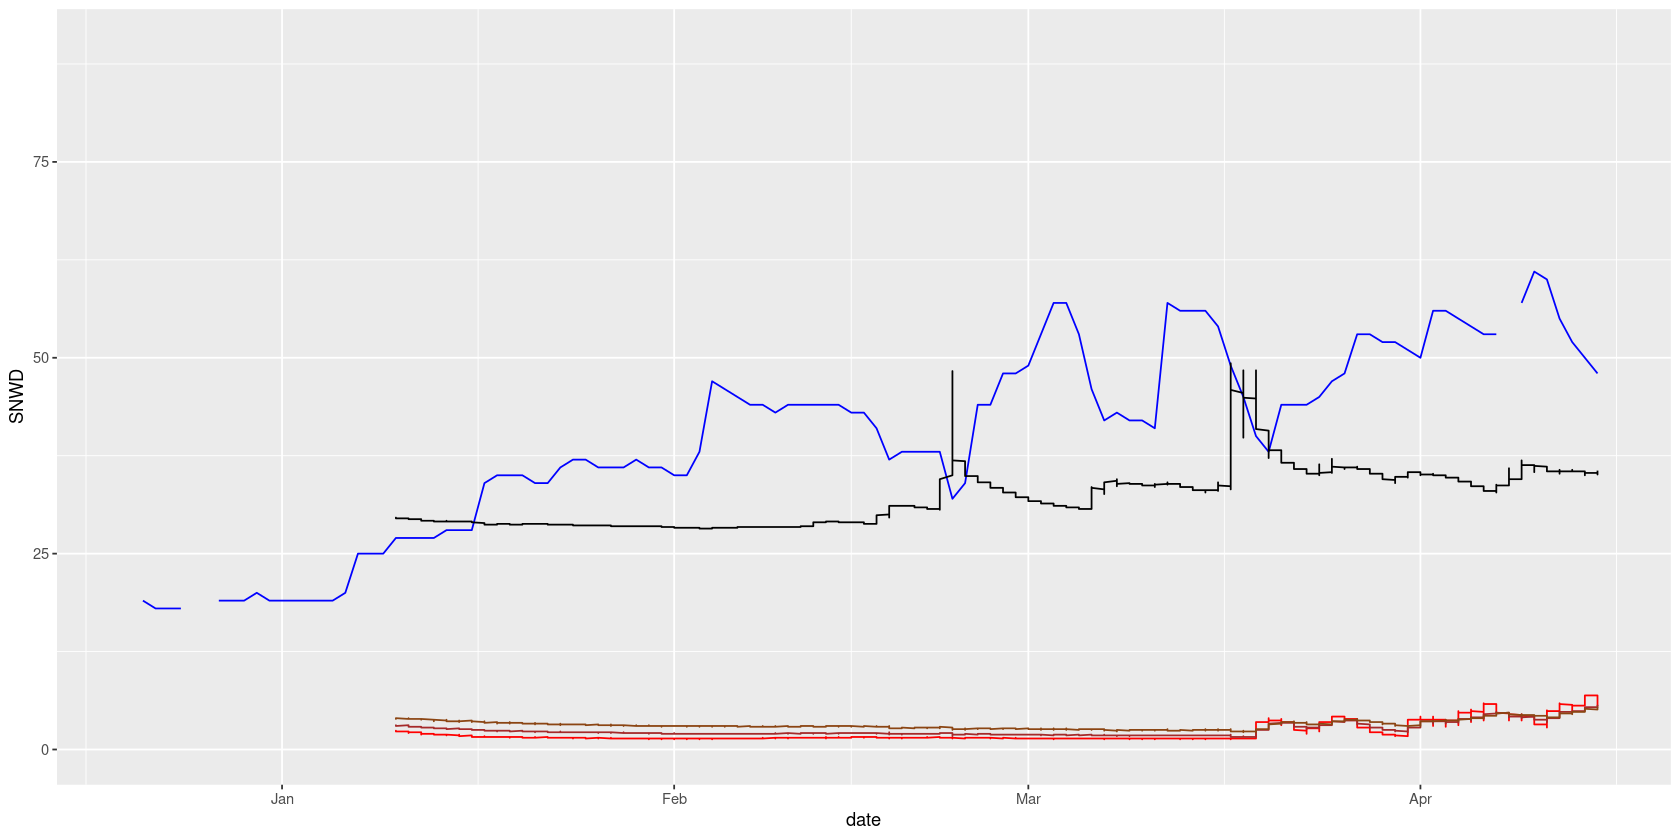

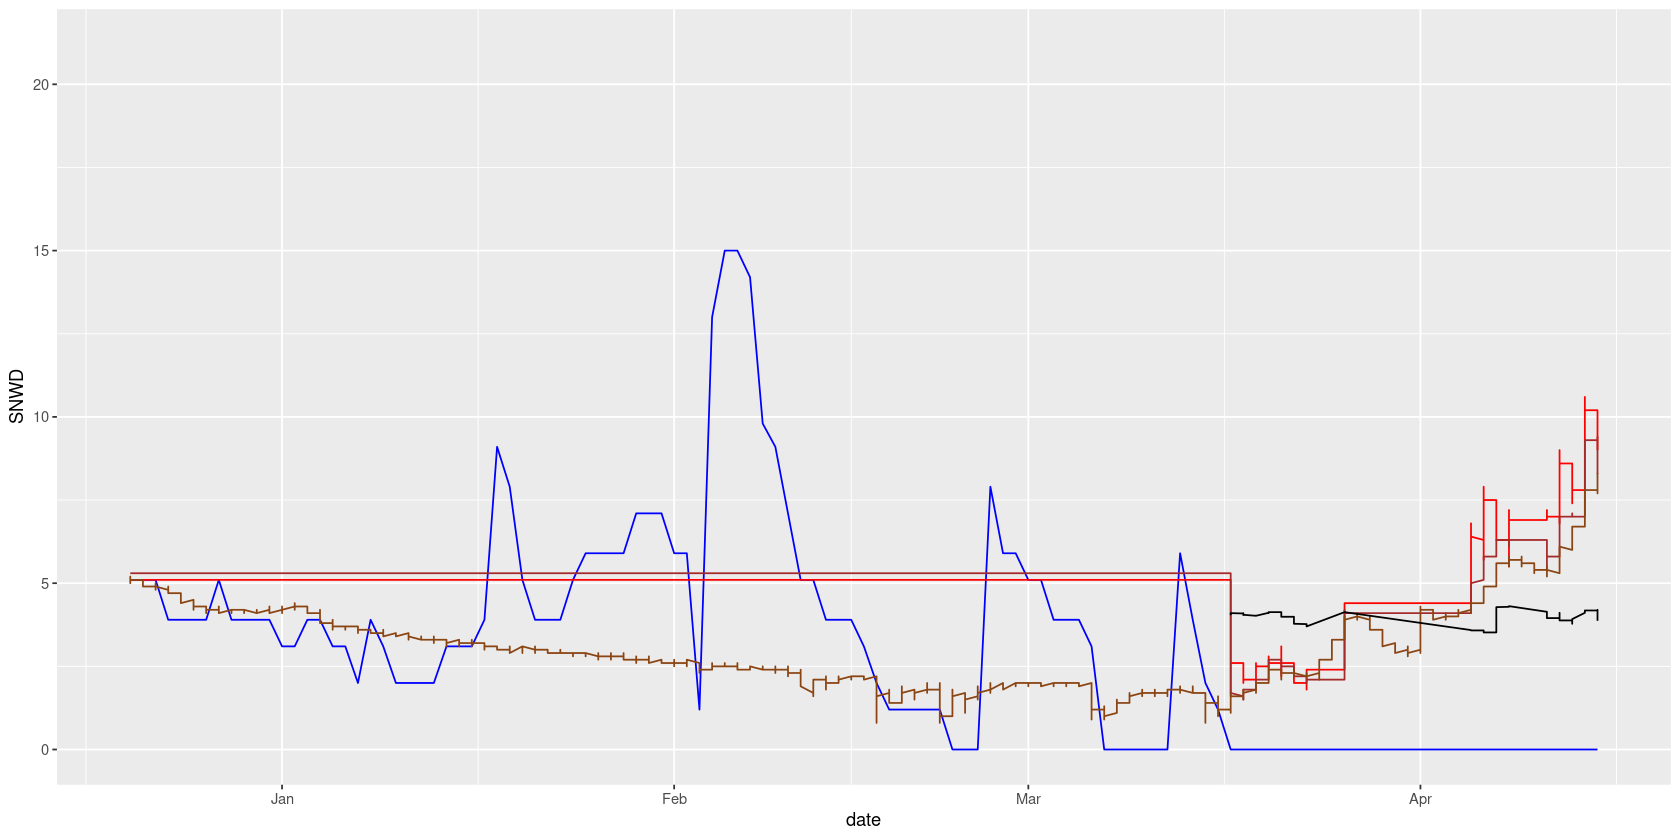

In [123]:
#################
# LOAD PACKAGES #
#################

library(tidyverse)
library(dplyr)
library(lubridate)
library(patchwork)
library(scales)

###################
# SET DIRECTORIES #
###################

setwd("~//OneDrive/git-repos/cQ_analysis/snowpack/")

input_dir <- "~//OneDrive/git-repos/cQ_analysis/snowpack/data/"
soil_sensor_input_dir <- "~//OneDrive/git-repos/cQ_analysis/soil-sensors/data/WY22"
output_dir <- "~//OneDrive/git-repos/cQ_analysis/snowpack/noaa-output/"

###########################
# READ IN DATA AND FILTER #
###########################

# Read in the daily WY22 and WY23 NOAA total data
mmsf_data <- read.csv(file.path(input_dir, "mansfield-noaa-WY22-WY23-3855342.csv")) %>%
    mutate(date = ymd(DATE), # Convert the concatenated string to date format
          Stream = 'Wade')    # Add Site name for indexing later on
btv_data <- read.csv(file.path(input_dir, "btv-noaa-WY22-WY23-3855333.csv")) %>%
    mutate(date = ymd(DATE), 
           Stream = 'Hungerford')

#put both dataframes into a list
noaa_snowpack <- list(mmsf_data, btv_data)

# Define water year ranges
wy_ranges <- list(
  WY22 = c(ymd("2021-10-01"), ymd("2022-09-30")),
  WY23 = c(ymd("2022-10-01"), ymd("2023-09-30"))
)

# Filter data for each water year and add a 'WaterYear' column
filtered_data <- noaa_snowpack %>%
  bind_rows() %>%  # Combine data frames in the list into one
  mutate(WaterYear = case_when(
    between(date, wy_ranges$WY22[1], wy_ranges$WY22[2]) ~ "WY22",
    between(date, wy_ranges$WY23[1], wy_ranges$WY23[2]) ~ "WY23",
    TRUE ~ NA_character_
  )) %>%
  filter(!is.na(WaterYear))

# Read in WY22 soil temperature data for each stream
hungerford_dry_p1_15cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_15cm@HD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp15 = Value) %>%
  mutate(Stream = "Hungerford")

hungerford_dry_p1_30cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_30cm@HD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp30 = Value) %>%
  mutate(Stream = "Hungerford")

hungerford_dry_p1_45cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_45cm@HD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp45 = Value) %>%
  mutate(Stream = "Hungerford")

wade_dry_p1_15cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_15cm@WD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp15 = Value) %>%
  mutate(Stream = "Wade")

wade_dry_p1_30cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_30cm@WD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp30 = Value) %>%
  mutate(Stream = "Wade")

wade_dry_p1_45cm = read.csv(file.path(soil_sensor_input_dir, "Temperature.SoilTemp_45cm@WD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(temp45 = Value) %>%
  mutate(Stream = "Wade")

# Read in WY22 soil volumetric water content (just for 15 cm)

hungerford_dry_p1_15cm_vwc = read.csv(file.path(soil_sensor_input_dir, "Volumetric_Water_Content.VWC_15cm@HD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(percent15 = Value) %>%
  mutate(Stream = "Hungerford")

wade_dry_p1_15cm_vwc = read.csv(file.path(soil_sensor_input_dir, "Volumetric_Water_Content.VWC_15cm@WD_pit1.20210801.csv"), comment = "#",) %>%
  filter(Timestamp > as.Date("2021-10-01 00:00:00"), 
        Timestamp < as.Date("2022-09-30 00:00:00")) %>%
  mutate(date = as.Date(Timestamp)) %>%
  mutate(percent15 = Value) %>%
  mutate(Stream = "Wade")


##############################
# PLOT SNOW DEPTH TIMESERIES #
##############################

# Create the plot
p1 <- ggplot(filtered_data, aes(x = date, y = SNWD, color = WaterYear)) +
  geom_line() +
  facet_wrap(~ Stream, scales = "free_y") +  # Facet by site
  labs(
    title = "NOAA snow depth timeseries WY22 and WY23",
    x = "Date",
    y = "Snowpack depth (cm)"
  ) +
  #theme_minimal() +
  theme(legend.position = "bottom")

agg_png(pngfile, width = 20, height = 6, units = "cm", res = 300)

pngfile <- fs::path(knitr::fig_path(),  "noaa-snopack.png")

plot(p1)
invisible(dev.off())
knitr::include_graphics(pngfile)

p1

p2 <- ggplot() + 
geom_line(data=mmsf_data, aes(x=date, y=SNWD), color='blue', label = "Snowpack depth") + 
geom_line(data=wade_dry_p1_15cm, aes(x=date, y=temp15), color='red') +
geom_line(data=wade_dry_p1_30cm, aes(x=date, y=temp30), color='#A52A2A') +
geom_line(data=wade_dry_p1_45cm, aes(x=date, y=temp45), color='chocolate4') +
geom_line(data=wade_dry_p1_15cm_vwc, aes(x=date, y=percent15*100), color='black') +
scale_x_date(limits = as.Date(c("2021-12-20", "2022-04-15"))) +
theme(legend.position = "upper right")

p2

p3 <- ggplot() + 
geom_line(data=btv_data, aes(x=date, y=SNWD), color='blue') + 
geom_line(data=hungerford_dry_p1_15cm, aes(x=date, y=temp15), color='red') +
geom_line(data=hungerford_dry_p1_30cm, aes(x=date, y=temp30), color='#A52A2A') +
geom_line(data=hungerford_dry_p1_45cm, aes(x=date, y=temp45), color='chocolate4') +
geom_line(data=hungerford_dry_p1_15cm_vwc, aes(x=date, y=percent15*10), color='black') +
scale_x_date(limits = as.Date(c("2021-12-20", "2022-04-15")))

p3

# Comparing soil temperature (from soil sensor transects)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2862 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2862 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'


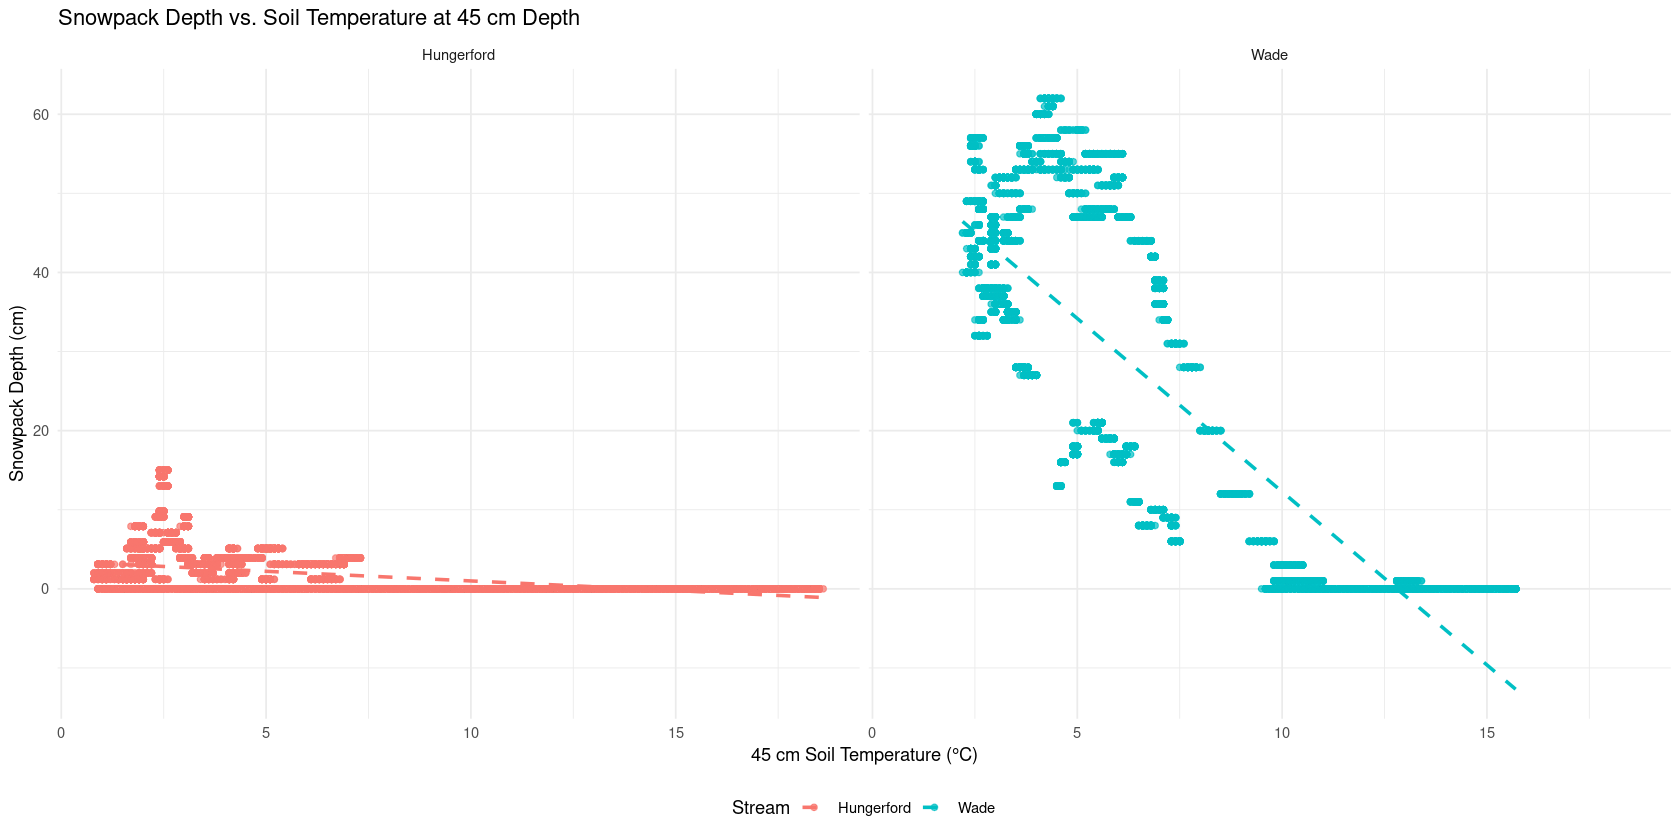

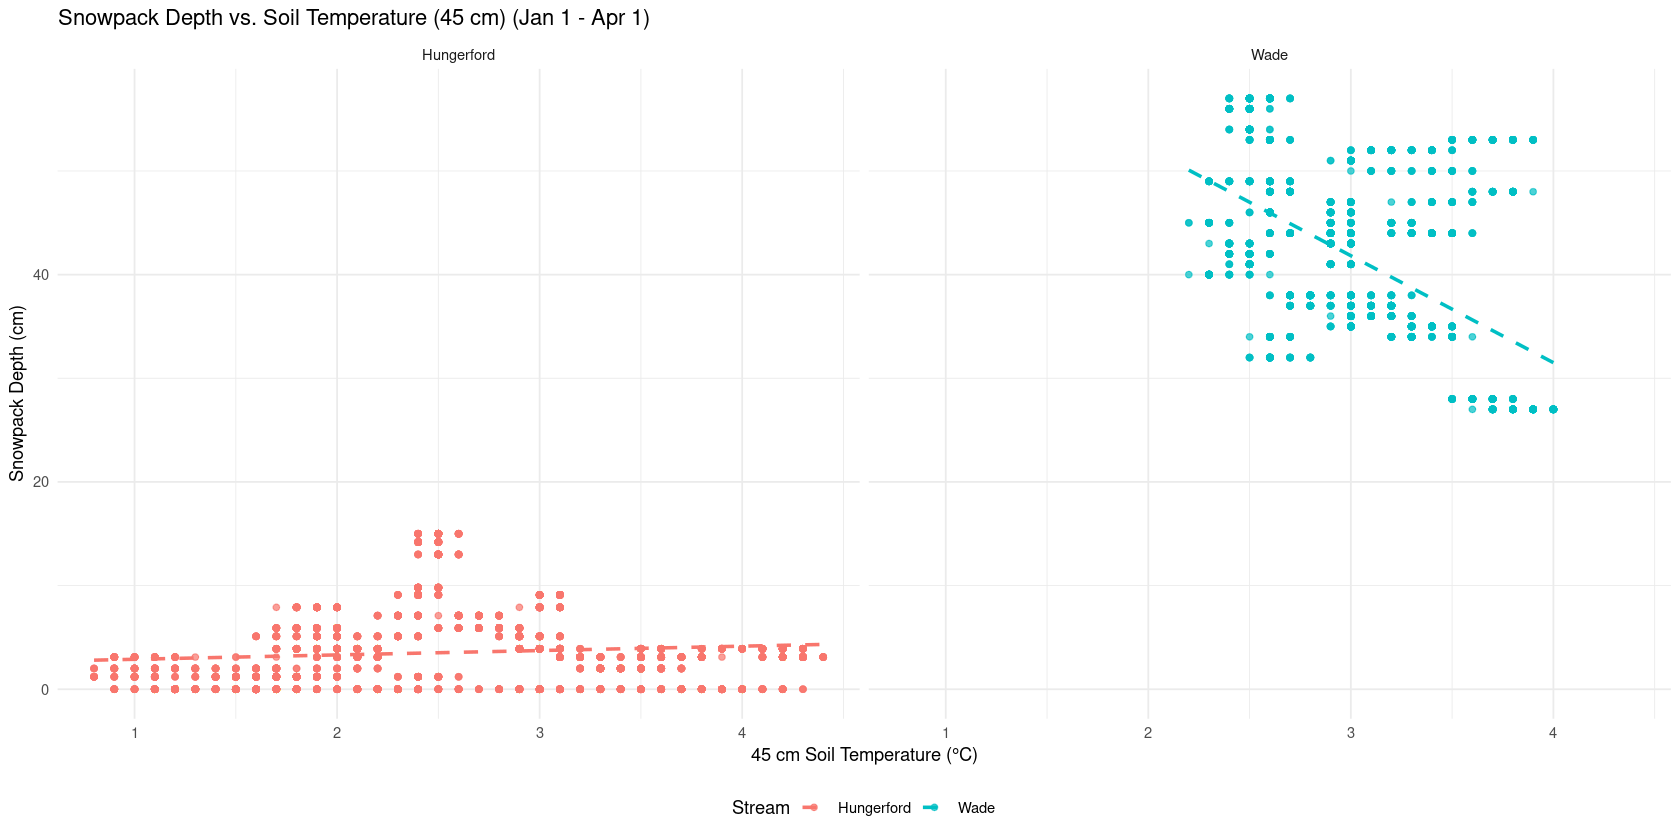

In [108]:
########################
# COMBINE DATA SOURCES #
########################

# Combine soil temperature data for 45 cm depth
soil_temp_45cm <- bind_rows(
  hungerford_dry_p1_45cm %>% select(date, temp45, Stream),
  wade_dry_p1_45cm %>% select(date, temp45, Stream)
)

# Merge with snowpack data on date and stream
combined_data <- filtered_data %>%
  select(date, SNWD, Stream) %>%
  inner_join(soil_temp_45cm, by = c("date", "Stream"))

# Filter combined data for dates between January 1 and April 1 WY22
filtered_combined_data <- combined_data %>%
  filter(date >= ymd("2022-01-01") & date <= ymd("2022-04-01"))

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis)
scatterplot <- ggplot(combined_data, aes(x = temp45, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature at 45 cm Depth",
    x = "45 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis) for filtered data
scatterplot_filtered <- ggplot(filtered_combined_data, aes(x = temp45, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature (45 cm) (Jan 1 - Apr 1)",
    x = "45 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot_filtered

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2862 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2862 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'


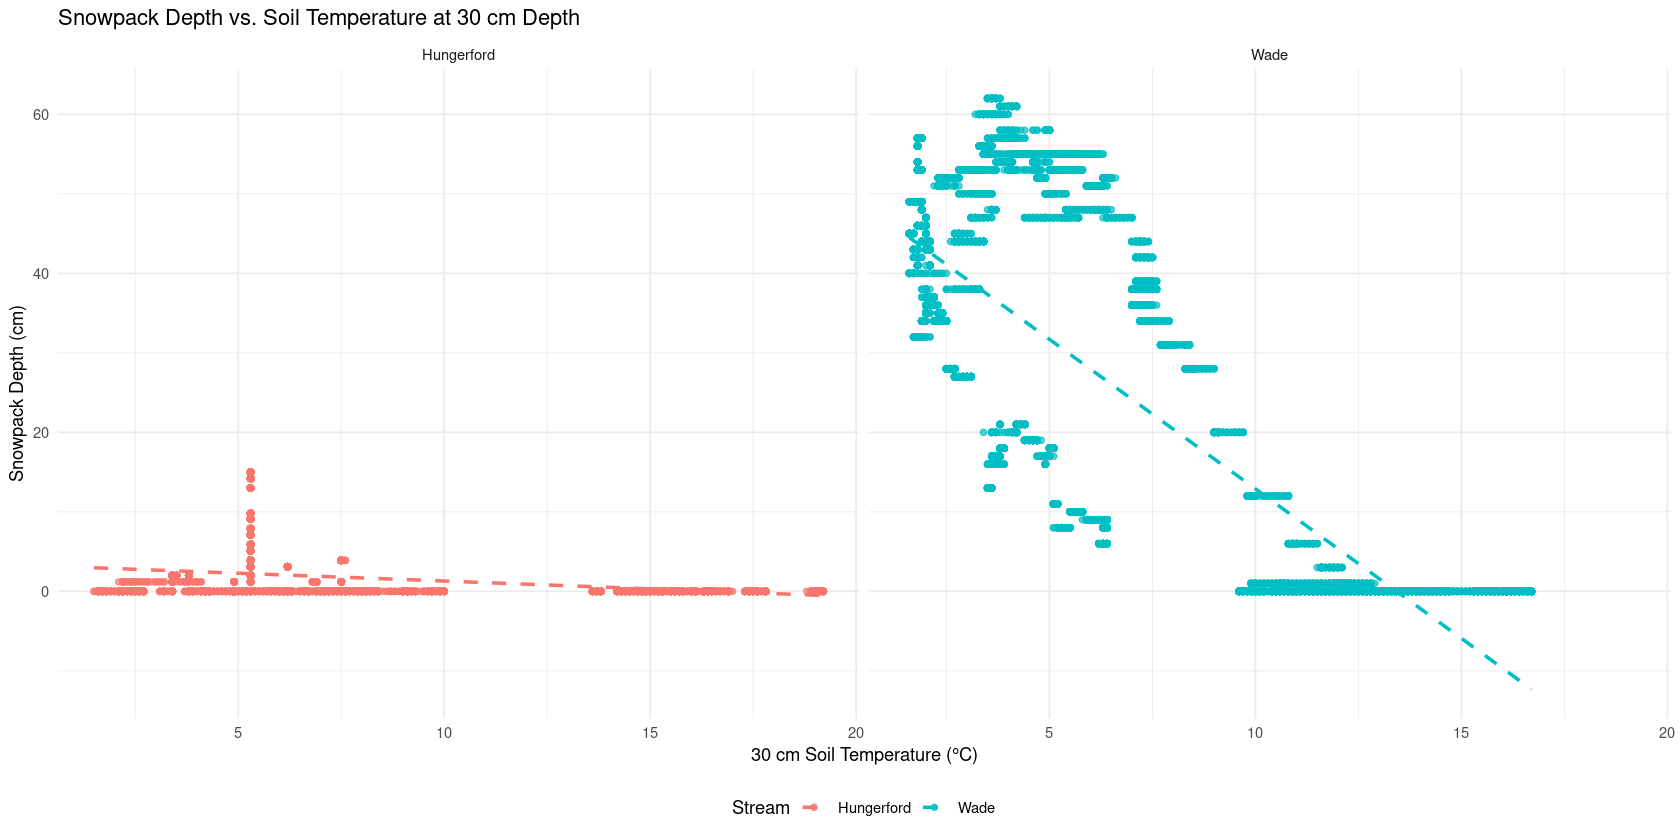

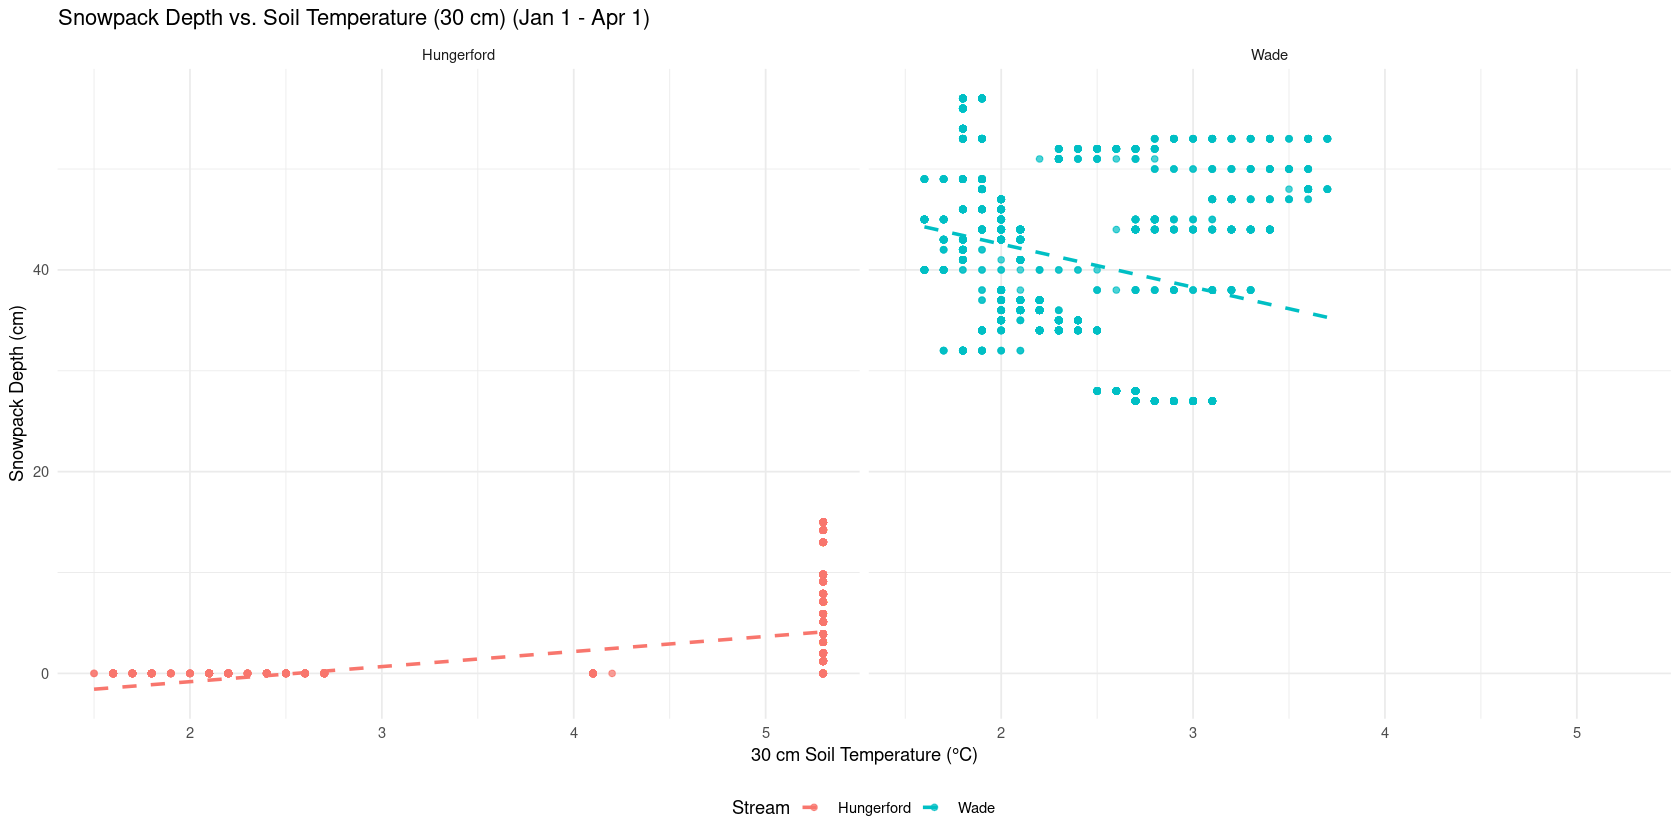

In [110]:
########################
# COMBINE DATA SOURCES #
########################

# Combine soil temperature data for 30 cm depth
soil_temp_30cm <- bind_rows(
  hungerford_dry_p1_30cm %>% select(date, temp30, Stream),
  wade_dry_p1_30cm %>% select(date, temp30, Stream)
)

# Merge with snowpack data on date and stream
combined_data <- filtered_data %>%
  select(date, SNWD, Stream) %>%
  inner_join(soil_temp_30cm, by = c("date", "Stream"))

# Filter combined data for dates between January 1 and April 1 WY22
filtered_combined_data <- combined_data %>%
  filter(date >= ymd("2022-01-01") & date <= ymd("2022-04-01"))

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis)
scatterplot <- ggplot(combined_data, aes(x = temp30, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature at 30 cm Depth",
    x = "30 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis) for filtered data
scatterplot_filtered <- ggplot(filtered_combined_data, aes(x = temp30, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature (30 cm) (Jan 1 - Apr 1)",
    x = "30 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot_filtered

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2862 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2862 rows containing missing values (`geom_point()`).”
`geom_smooth()` using formula = 'y ~ x'


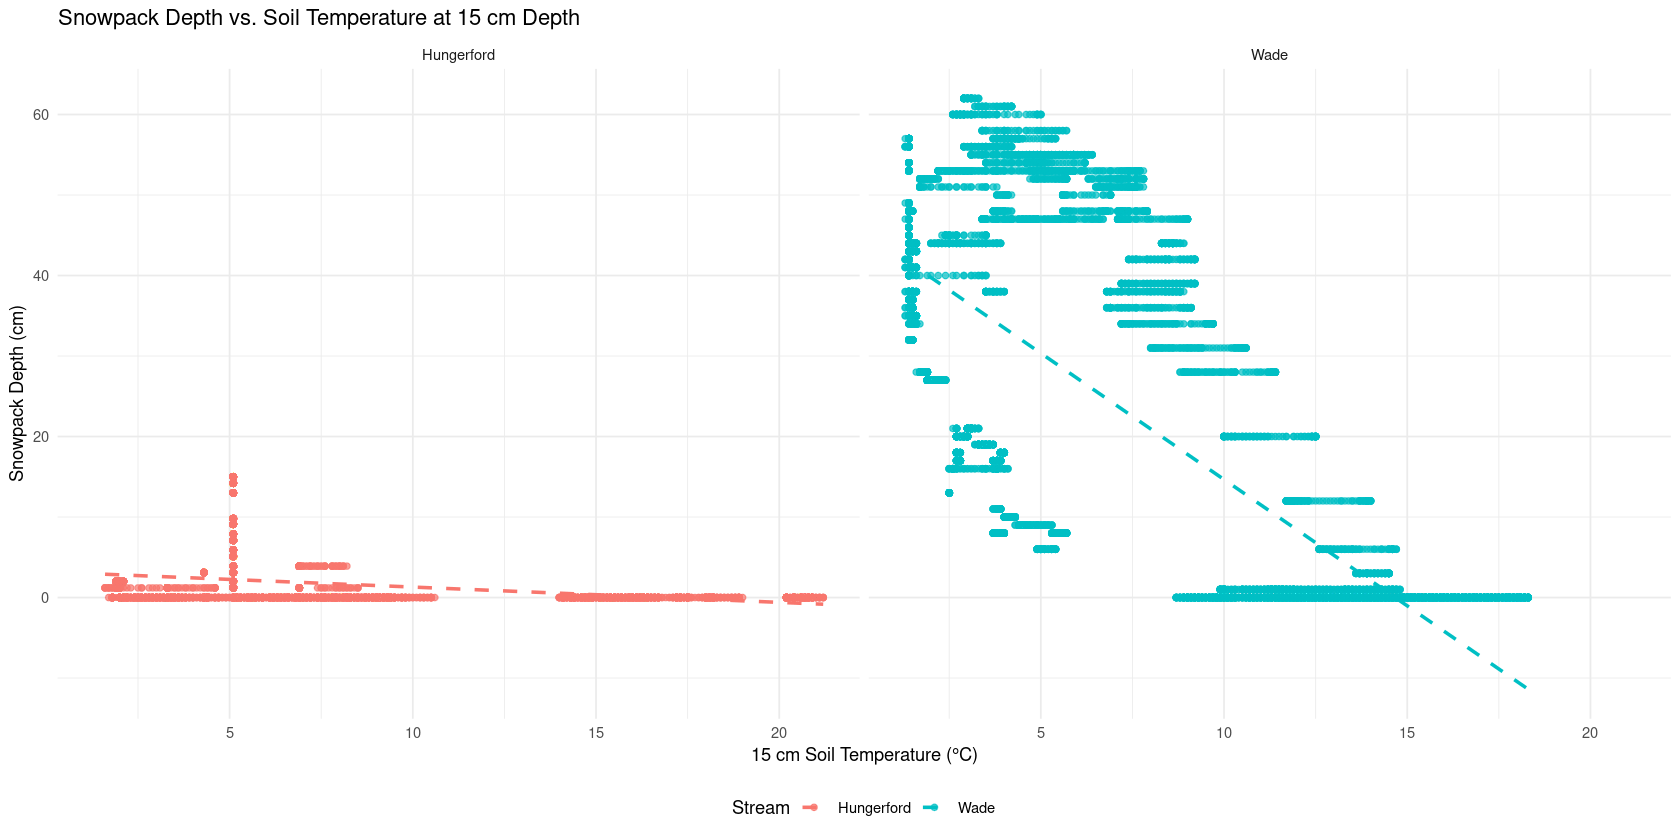

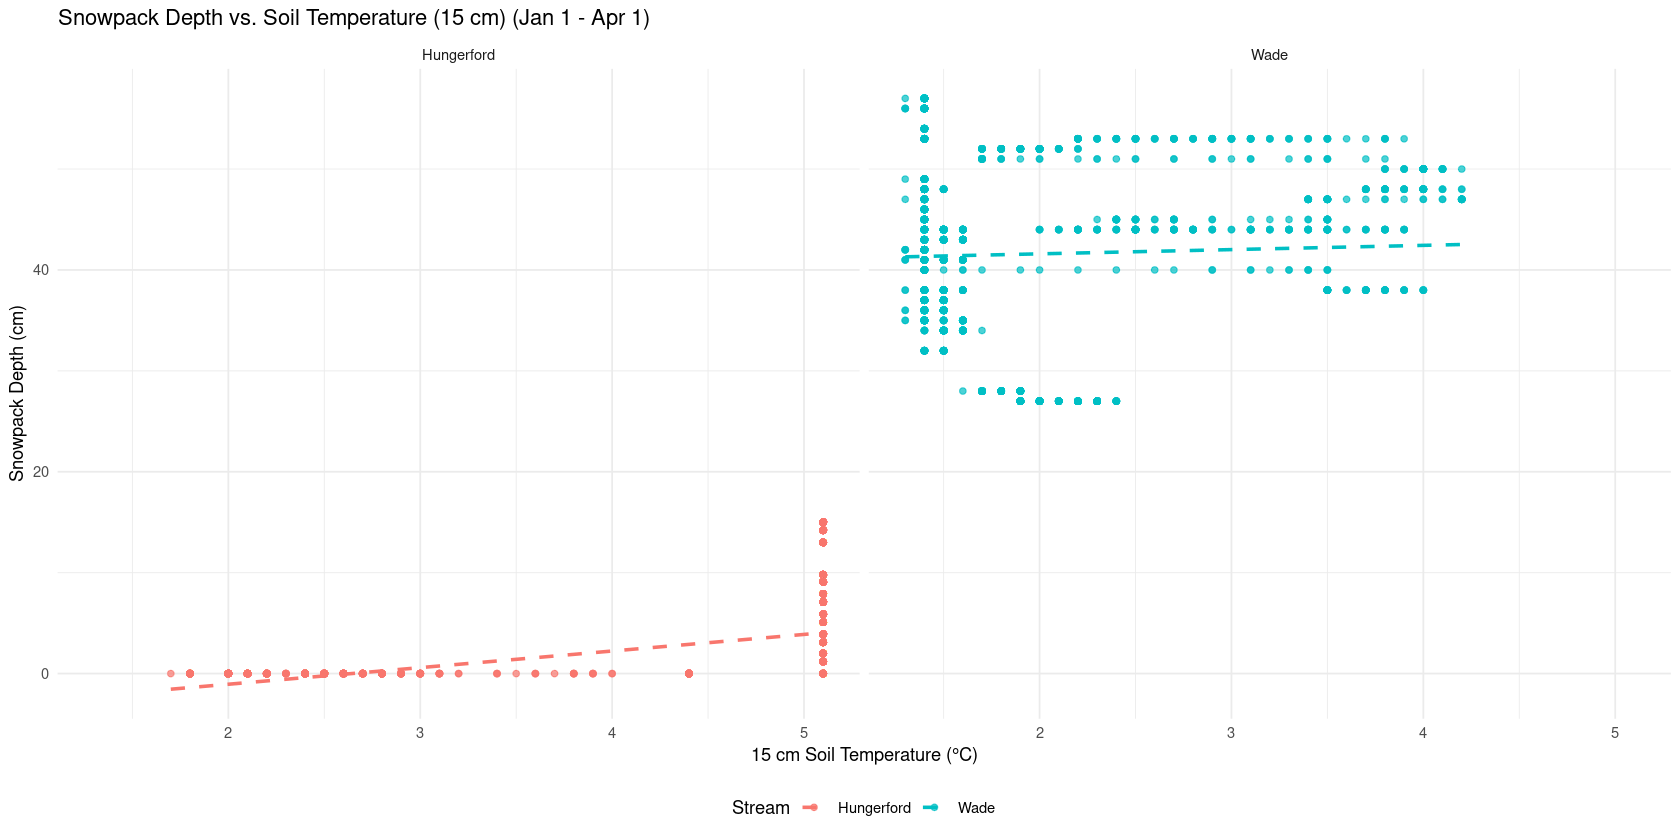

In [109]:
########################
# COMBINE DATA SOURCES #
########################

# Combine soil temperature data for 15 cm depth
soil_temp_15cm <- bind_rows(
  hungerford_dry_p1_15cm %>% select(date, temp15, Stream),
  wade_dry_p1_15cm %>% select(date, temp15, Stream)
)

# Merge with snowpack data on date and stream
combined_data <- filtered_data %>%
  select(date, SNWD, Stream) %>%
  inner_join(soil_temp_15cm, by = c("date", "Stream"))

# Filter combined data for dates between January 1 and April 1 WY22
filtered_combined_data <- combined_data %>%
  filter(date >= ymd("2022-01-01") & date <= ymd("2022-04-01"))

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis)
scatterplot <- ggplot(combined_data, aes(x = temp15, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature at 15 cm Depth",
    x = "15 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot

#####################
# CREATE SCATTERPLOT #
#####################

# Scatterplot of soil temperature (x-axis) vs snowpack depth (y-axis) for filtered data
scatterplot_filtered <- ggplot(filtered_combined_data, aes(x = temp15, y = SNWD, color = Stream)) +
  geom_point(alpha = 0.7) +
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Optional trend line
  facet_wrap(~ Stream) +  # Separate plots for each stream
  labs(
    title = "Snowpack Depth vs. Soil Temperature (15 cm) (Jan 1 - Apr 1)",
    x = "15 cm Soil Temperature (°C)",
    y = "Snowpack Depth (cm)"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom")

# Display the plot
scatterplot_filtered

In [ ]:
# Define Water Year 2022
wy22_start <- as.Date("2021-10-01")
wy22_end <- as.Date("2022-09-30")

# Define Water Year 2023
wy23_start <- as.Date("2022-10-01")
wy23_end <- as.Date("2023-09-30")

# Filter data for Water Year 2022
resin_data_wy22 <- resin_data %>%
  filter(Date >= wy22_start & Date <= wy22_end)

# Filter data for Water Year 2022
resin_data_wy23 <- resin_data %>%
  filter(Date >= wy23_start & Date <= wy23_end)

# Read in event yield data
#yield_data <- read.csv(file.path(yield_input_dir, "Wade_NO3_2021-2023_StormEventSummaryDataCustomDelineations.csv"))
wade_yield_data <- read.csv(file.path(yield_input_dir, "Wade_WY22_storm_NO3_yields.csv"))